In [4]:
import numpy as np
import plotly.express as px
import pandas as pd

In [242]:
xs = np.arange(0,1,0.01)
def demand_f(x): 
    return (1-x)**2
def under_demand(x): 
    return demand_f(x) - 0.25
def over_demand(x): 
    return demand_f(x) + 0.25

demands = pd.DataFrame(dict(
    price = xs,
    demand = demand_f(xs),
    over_demand = over_demand(xs),
    under_demand = under_demand(xs)
))

In [243]:
def set_names(fig, labels): 
    fig.for_each_trace(lambda t: t.update(name = labels[t.name],
                        legendgroup = labels[t.name],
                        hovertemplate = t.hovertemplate.replace(t.name, labels[t.name])
                        ))

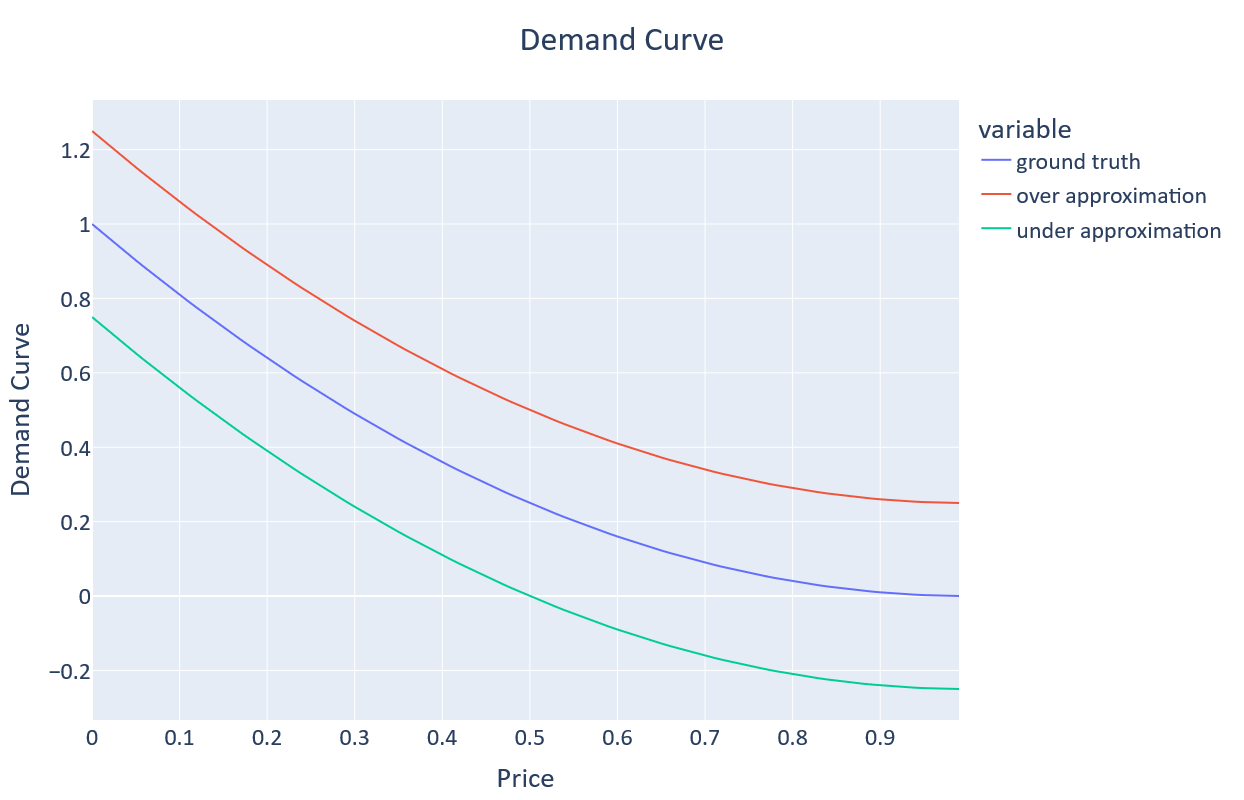

In [252]:
fig = px.line(demands, x="price", y=["demand", "over_demand", "under_demand"], title="Demand Curve") 
labels={"demand": "ground truth", "over_demand":"over approximation", "under_demand":"under approximation"}
set_names(fig, labels)

fig.update_layout(font_family="Calibri", font_size=24)
fig.update_layout(yaxis_title="Demand Curve", xaxis_title="Price", title_x=0.5, width = 1200, height = 800)
fig.show()

In [280]:
def revenue(prices, predictions): 
    return prices * predictions

revenues = pd.DataFrame(dict(
    price = xs,
    true_revenue = revenue(xs, demands.demand.values),
    over_revenue = revenue(xs, demands.over_demand.values),
    under_revenue = revenue(xs, demands.under_demand.values)
))

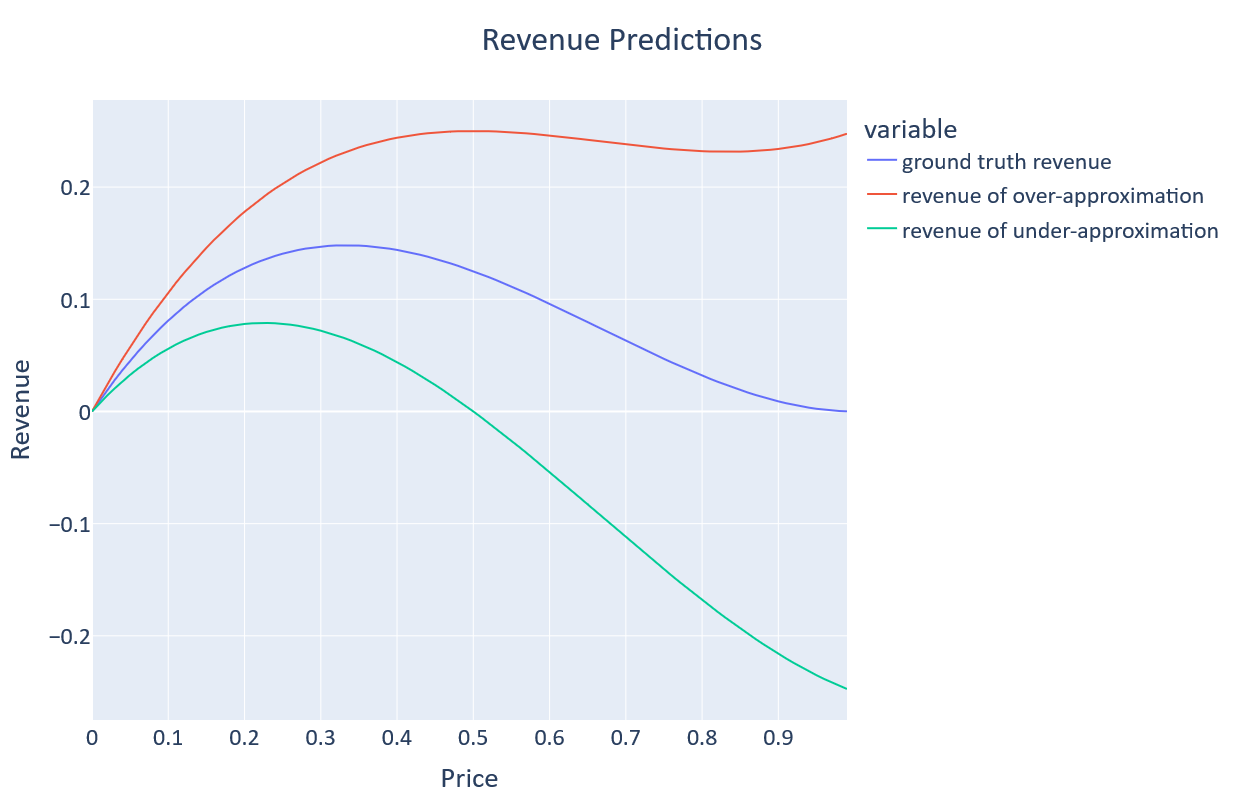

In [281]:
fig = px.line(revenues, x="price", y=["true_revenue", "over_revenue", "under_revenue"], title="Revenue Predictions") 
labels={"true_revenue": "ground truth revenue", "over_revenue":"revenue of over-approximation", "under_revenue":"revenue of under-approximation"}
set_names(fig, labels)

fig.update_layout(font_family="Calibri", font_size=24)
fig.update_layout(yaxis_title="Revenue", xaxis_title="Price", title_x=0.5, width = 1200, height = 800)
fig.show()

In [256]:
under_approx_decision = revenues.under_revenue.argmax()
over_approx_decision = revenues.over_revenue.argmax()

In [257]:
optimal_decision = revenues.true_revenue.argmax()
optimal_revenue = revenues.true_revenue.max()
optimal_price = revenues.price[optimal_decision]

under_decision = revenues.under_revenue.argmax()
under_price = revenues.price[under_decision]
under_revenue = revenues.true_revenue[under_decision]
under_prediction = revenues.under_revenue[under_decision]

over_decision = revenues.over_revenue.argmax()
over_price = revenues.price[over_decision]
over_revenue = revenues.true_revenue[over_decision]
over_prediction = revenues.over_revenue[over_decision]


optimal_choice = pd.DataFrame(dict(
    p = [optimal_price],
    g = [optimal_revenue],
    r = [optimal_revenue]
))

under_choice = pd.DataFrame(dict(
    p = [under_price],
    r = [under_revenue],
    g = [under_prediction]
))

over_choice = pd.DataFrame(dict(
    p = [over_price],
    r = [over_revenue],
    g = [over_prediction]
))


In [258]:
optimal_revenue

0.148137

In [259]:
print(optimal_choice.r)

0    0.148137
Name: r, dtype: float64


      p         g         r
0  0.33  0.148137  0.148137
     p      r     g
0  0.5  0.125  0.25
      p         r         g
0  0.23  0.136367  0.078867


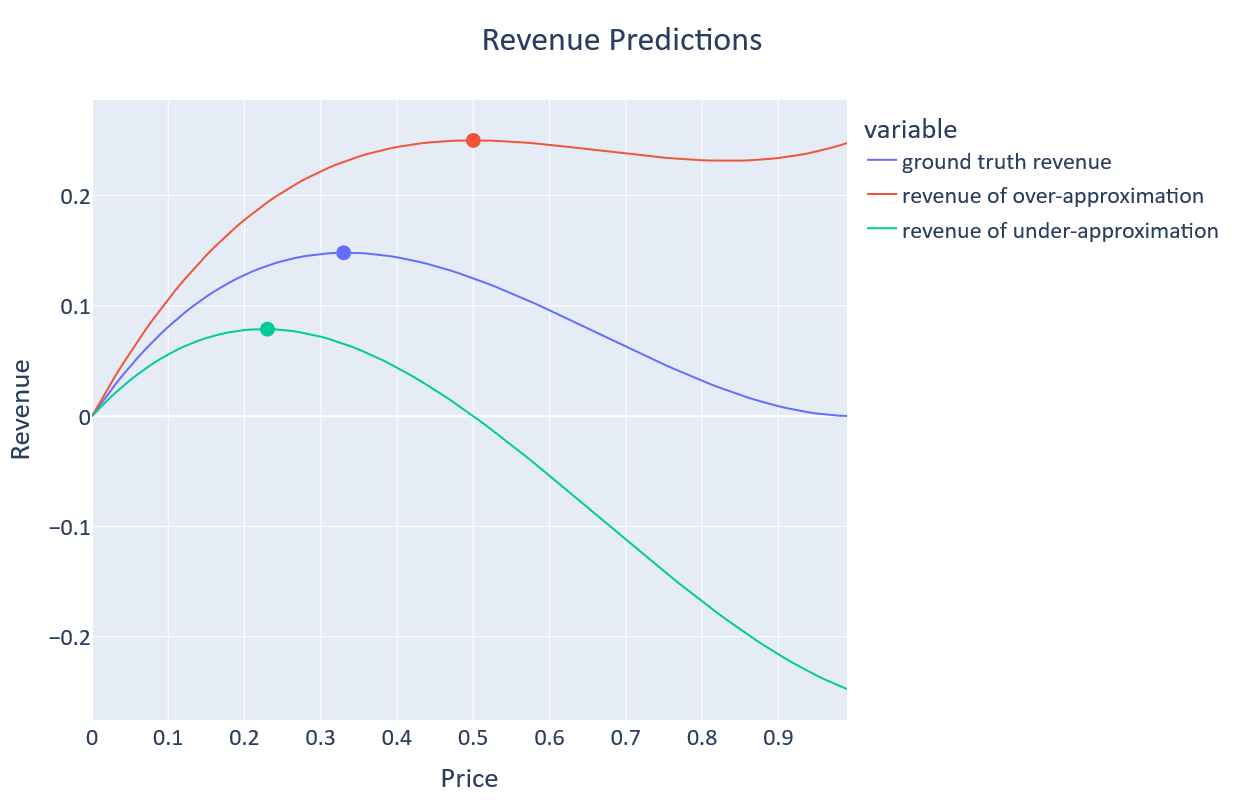

In [266]:
import plotly.graph_objects as go

fig = px.line(revenues, x="price", y=["true_revenue", "over_revenue", "under_revenue"], title="Revenue Predictions") 
labels={"true_revenue": "ground truth revenue", "over_revenue":"revenue of over-approximation", "under_revenue":"revenue of under-approximation"}
set_names(fig, labels)

for choice, d in zip([optimal_choice, over_choice, under_choice], fig.data[:3]):
    print(choice)
    # fig.add_traces(go.Scatter(x=choice.p, y=choice.r, 
    #                             mode='markers', 
    #                             showlegend=False, 
    #                             marker=dict(color=d.line.color)
    #                             ))
    fig.add_traces(go.Scatter(x=choice.p, y=choice.g, 
                                mode='markers', 
                                showlegend=False, 
                                marker=dict(color=d.line.color, size=15),
                                ))

# fig.add_scatter(x=choice.p.values, y=chioce.r.values, mode='markers', showlegend=False)
# fig.update_traces(marker=dict(color='black'))

fig.update_layout(font_family="Calibri", font_size=24)
fig.update_layout(yaxis_title="Revenue", xaxis_title="Price", title_x=0.5, width = 1400, height = 800)
fig.show()

      p         g         r
0  0.33  0.148137  0.148137
     p      r     g
0  0.5  0.125  0.25
      p         r         g
0  0.23  0.136367  0.078867


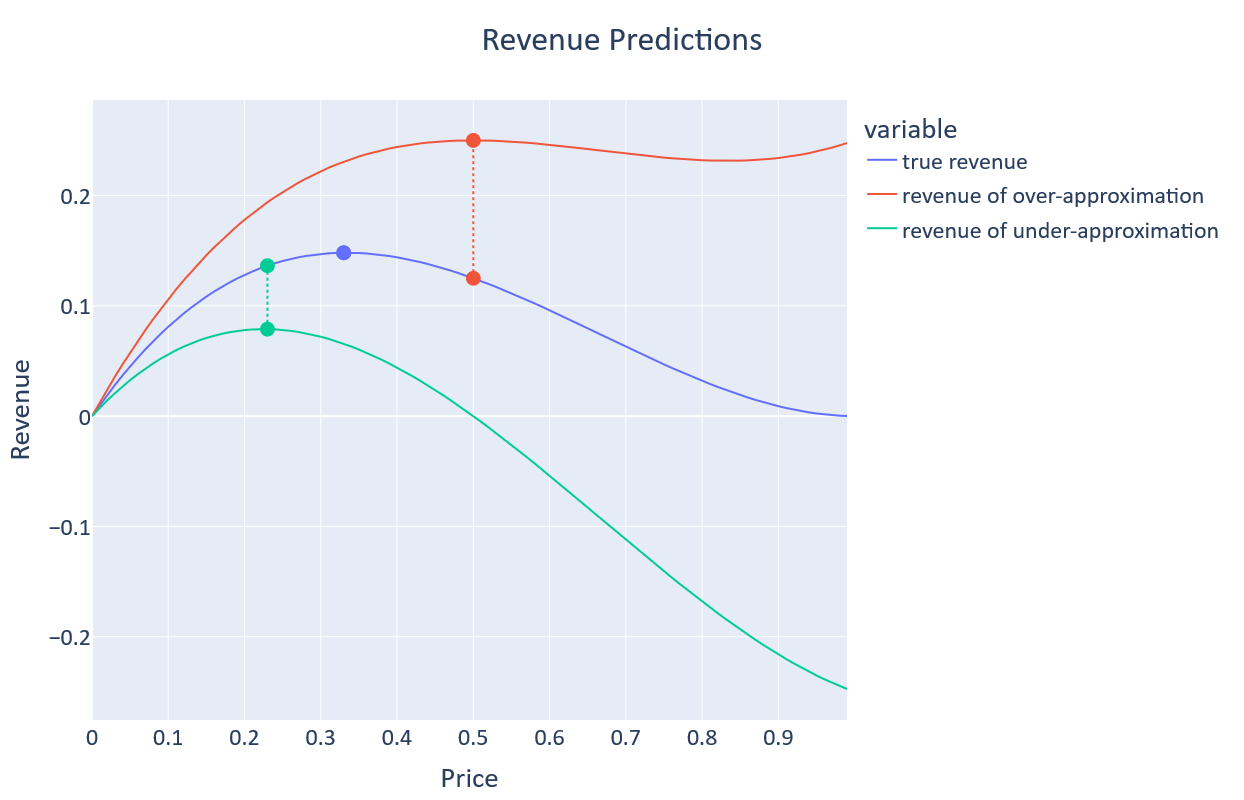

In [267]:
import plotly.graph_objects as go

fig = px.line(revenues, x="price", y=["true_revenue", "over_revenue", "under_revenue"], title="Revenue Predictions") 
labels={"true_revenue": "true revenue", "over_revenue":"revenue of over-approximation", "under_revenue":"revenue of under-approximation"}
set_names(fig, labels)

for choice, d in zip([optimal_choice, over_choice, under_choice], fig.data[:3]):
    print(choice)
    fig.add_trace(go.Scatter(x=[choice.p[0], choice.p[0]], y=[choice.r[0], choice.g[0]],
                                mode='lines+markers', 
                                showlegend=False, 
                                marker=dict(color=d.line.color, size=15),
                                line=dict(dash='dot')
                                ))

fig.update_layout(font_family="Calibri", font_size=24)
fig.update_layout(yaxis_title="Revenue", xaxis_title="Price", title_x=0.5, width = 1400, height = 800)
fig.show()

In [241]:
print("Optimal Decision: {}, with Revenue: {}".format(optimal_price, optimal_revenue))
print("Under-approximation Decision: {}, with Revenue: {}".format(under_price, under_revenue))
print("Over-approximation Decision: {}, with Revenue: {}".format(over_price, over_revenue))

Optimal Decision: 0.33, with Revenue: 0.148137
Under-approximation Decision: 0.23, with Revenue: 0.136367
Over-approximation Decision: 0.5, with Revenue: 0.125
